In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

The fraud risk dataset is very large with 19030 rows and 2330 columns. The Experian Dictionary is a data dictionary that accompanies the fraud risk data set. This document provides a description of what the columns represent. The dataset the columns are represented by arbitraty letters and numbers. Among these 2330 variables there are many that are similar to one another, for instance ALL0416 represents "Total number of open trades reported in the last 6 months" while ALL0436 represents "Total number of open trades opened in the last 6 months".  

In [2]:
df_credit = pd.read_csv('fraud_risk_dataset.csv', header=0,index_col=0)
df_credit.head()

,portfolio_id,product_term_credit_limit,NP,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,1908,500,0,0,2,1,1,33521,50283,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,1908,500,0,0,1,0,0,999999997,999999997,999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,1908,500,0,1,2,0,0,999999997,999999997,999999997,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [3]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19030 entries, 1 to 19030
Columns: 2329 entries, portfolio_id to TSTU4908
dtypes: float64(836), int64(1493)
memory usage: 338.3 MB
None


In [4]:
print(df_credit.nunique())

portfolio_id                 17
product_term_credit_limit     4
NP                            2
cash_intent                   2
ALJ0300                      30
                             ..
TSTU3907                     12
TSTU3908                     12
TSTU4906                      6
TSTU4907                     20
TSTU4908                     20
Length: 2329, dtype: int64


In [5]:
data = df_credit[['portfolio_id','product_term_credit_limit','NP','cash_intent']].copy()

In [6]:
#correlation matrix
#corrval = df.corr()
#visual = plt.figure(figsize = (12,9))

#sns.heatmap(corrval, vmax = 1, square = True)
#plt.savefig("corr_graph.png")

In [7]:
df_NP = data[['NP','product_term_credit_limit']].groupby('NP').count()
df_NP

,product_term_credit_limit
NP,
0,17305
1,1725


In [8]:
df_credit.portfolio_id.unique()
#2019-08 to 2021-05

array([1908, 1909, 1910, 1912, 2001, 2002, 2003, 2006, 2007, 2008, 2009,
       2011, 2012, 2102, 2103, 2104, 2105], dtype=int64)

In [9]:
df_credit.product_term_credit_limit.unique()

array([ 500, 1000,  750,  300], dtype=int64)

In [10]:
df_credit.NP.value_counts()

0    17305
1     1725
Name: NP, dtype: int64

In [11]:
df_credit.cash_intent.value_counts()

0    15678
1     3352
Name: cash_intent, dtype: int64

In [12]:
fraud = df_credit[df_credit['NP'] == 0]
valid = df_credit[df_credit['NP'] == 1]

outlier_fraction  = len(fraud)/float(len(valid))
print(outlier_fraction)

print('Fraud transactions: {}'.format(len(fraud)))
print('Non Fraud transactions: {}'.format(len(valid)))

10.031884057971014
Fraud transactions: 17305
Non Fraud transactions: 1725


In [13]:
cc_Data = df_credit.copy()

In [14]:
cc_Data['portfolio_id'] = '20' + cc_Data['portfolio_id'].astype(str)

In [15]:
cc_Data['portfolio_id'] = pd.to_datetime(cc_Data['portfolio_id'], format='%Y%m')
cc_Data.head()

,portfolio_id,product_term_credit_limit,NP,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,2019-08-01,500,0,0,2,1,1,33521,50283,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-08-01,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,2019-08-01,500,0,0,1,0,0,999999997,999999997,999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-08-01,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,2019-08-01,500,0,1,2,0,0,999999997,999999997,999999997,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [16]:
cc_Data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19030 entries, 1 to 19030
Data columns (total 2329 columns):
 #     Column                     Non-Null Count  Dtype         
---    ------                     --------------  -----         
 0     portfolio_id               19030 non-null  datetime64[ns]
 1     product_term_credit_limit  19030 non-null  int64         
 2     NP                         19030 non-null  int64         
 3     cash_intent                19030 non-null  int64         
 4     ALJ0300                    19030 non-null  int64         
 5     ALJ0316                    19030 non-null  int64         
 6     ALJ0416                    19030 non-null  int64         
 7     ALJ5030                    19030 non-null  int64         
 8     ALJ5320                    19030 non-null  int64         
 9     ALJ5730                    19030 non-null  int64         
 10    ALJ5820                    19030 non-null  int64         
 11    ALJ5830                    19030 non-

In [17]:
# Dropping columns where there are 100% missing values. Clearly these columns are not useful for the analysis.
master = cc_Data.dropna(axis='columns',how='all')
round(100*(cc_Data.isnull().sum()/len(cc_Data.index)), 2)

portfolio_id                 0.00
product_term_credit_limit    0.00
NP                           0.00
cash_intent                  0.00
ALJ0300                      0.00
                             ... 
TSTU3907                     0.01
TSTU3908                     0.01
TSTU4906                     0.01
TSTU4907                     0.01
TSTU4908                     0.01
Length: 2329, dtype: float64

In [18]:
master.shape

(19030, 2329)

In [19]:
round(100*master.groupby('NP').size()/len(master),2)

NP
0    90.94
1     9.06
dtype: float64

[Text(0.5, 0, 'Paid Status'), Text(0, 0.5, 'Count')]

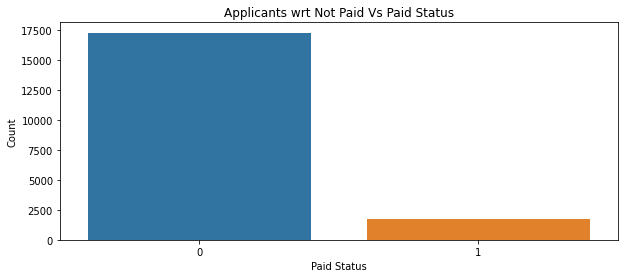

In [20]:
#code from https://github.com/vickysort/Exploratory-Data-Analysis/blob/main/Gramener%20Case%20Study.ipynb
plt.figure(figsize=(10, 4))
plt.title('Applicants wrt Not Paid Vs Paid Status')
ax = sns.countplot(x = "NP", data = master);
ax.set(xlabel='Paid Status', ylabel='Count')

In [21]:
master['issue_yr']=master['portfolio_id'].dt.year
master['issue_month']=master['portfolio_id'].dt.month
master['Quarter']=master['portfolio_id'].dt.quarter

In [22]:
fraud = master[master['NP'] == 0]
valid = master[master['NP'] == 1]

**Analysis of Fraud applicants**

In [23]:
round(100*fraud.groupby('issue_yr').size()/len(fraud),2).reset_index(name='percent').sort_values('percent',ascending=False)

,issue_yr,percent
2,2021,56.34
1,2020,35.56
0,2019,8.10


In [24]:
# fraud by quarter, 4th quarter tops
round(100*fraud.groupby(['Quarter']).size()/len(fraud),2).reset_index(name='percent').sort_values('percent',ascending=False)

,Quarter,percent
0,1,68.96
3,4,16.71
1,2,10.67
2,3,3.66


In [25]:
# Fraud by year and quarter, all year
round(100*fraud.groupby(['issue_yr','Quarter']).size()/len(fraud),2).reset_index(name='percent').sort_values(['percent','Quarter'],ascending=False)

,issue_yr,Quarter,percent
6,2021,1,56.28
2,2020,1,12.68
5,2020,4,12.12
3,2020,2,10.62
1,2019,4,4.59
0,2019,3,3.51
4,2020,3,0.15
7,2021,2,0.06


**Univariate analysis of product credit limit**

In [26]:
# displaying frequencies of each category
fraud['product_term_credit_limit'].value_counts()

300     5583
1000    4176
750     4002
500     3544
Name: product_term_credit_limit, dtype: int64

[Text(0.5, 0, 'Product Credit Limit'), Text(0, 0.5, 'Count')]

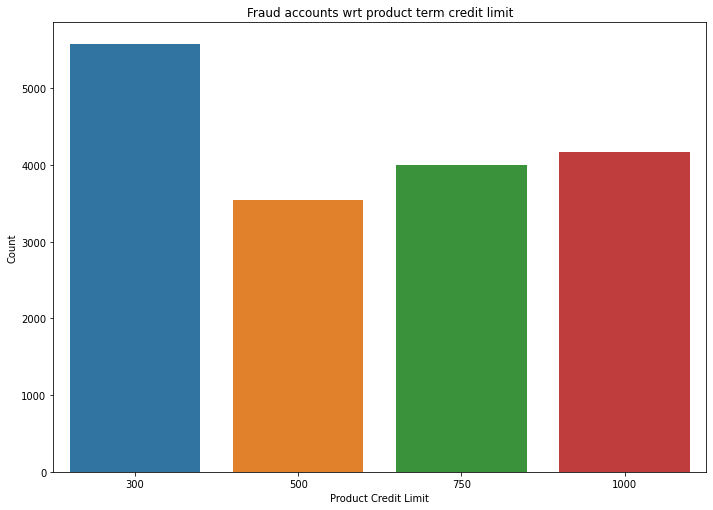

In [27]:
plt.figure(figsize=(11.7, 8.27))
plt.title('Fraud accounts wrt product term credit limit')
ax = sns.countplot(x = "product_term_credit_limit", data = fraud);
ax.set(xlabel='Product Credit Limit', ylabel='Count')

In [28]:
import warnings
warnings.filterwarnings("ignore")

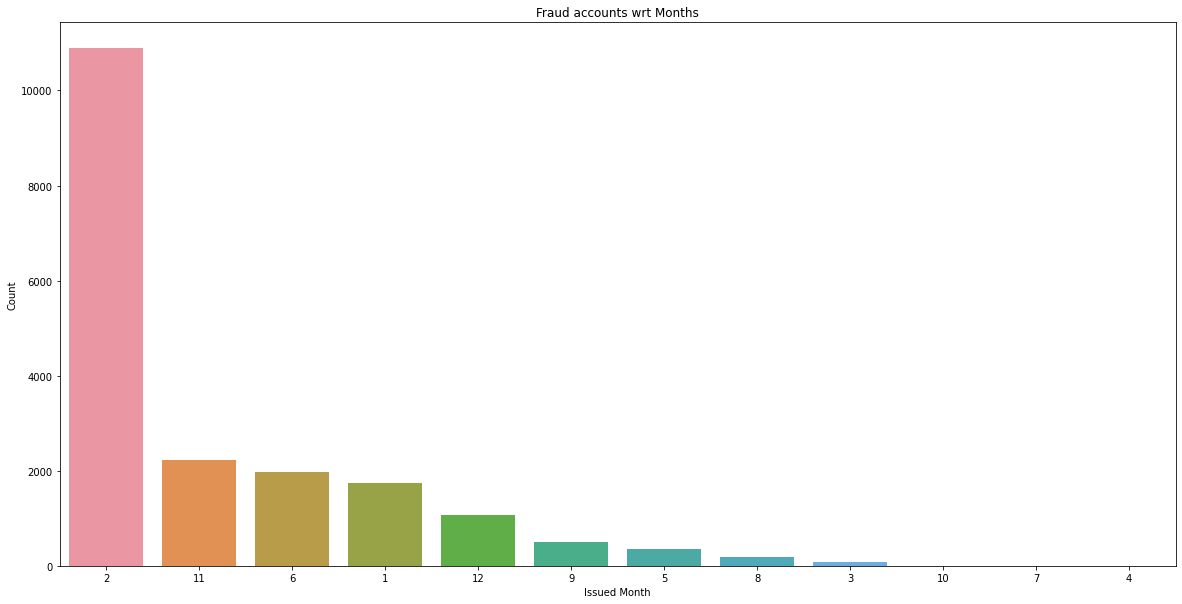

In [29]:
plt.figure(figsize=(20,10))
plt.title('Fraud accounts wrt Months')
ax = sns.countplot(x = "issue_month", data = master, order = master['issue_month'].value_counts().index);
ax.set(xlabel='Issued Month', ylabel='Count')
plt.show()

[Text(0.5, 0, 'Issue Date'), Text(0, 0.5, 'Product Credit Limit')]

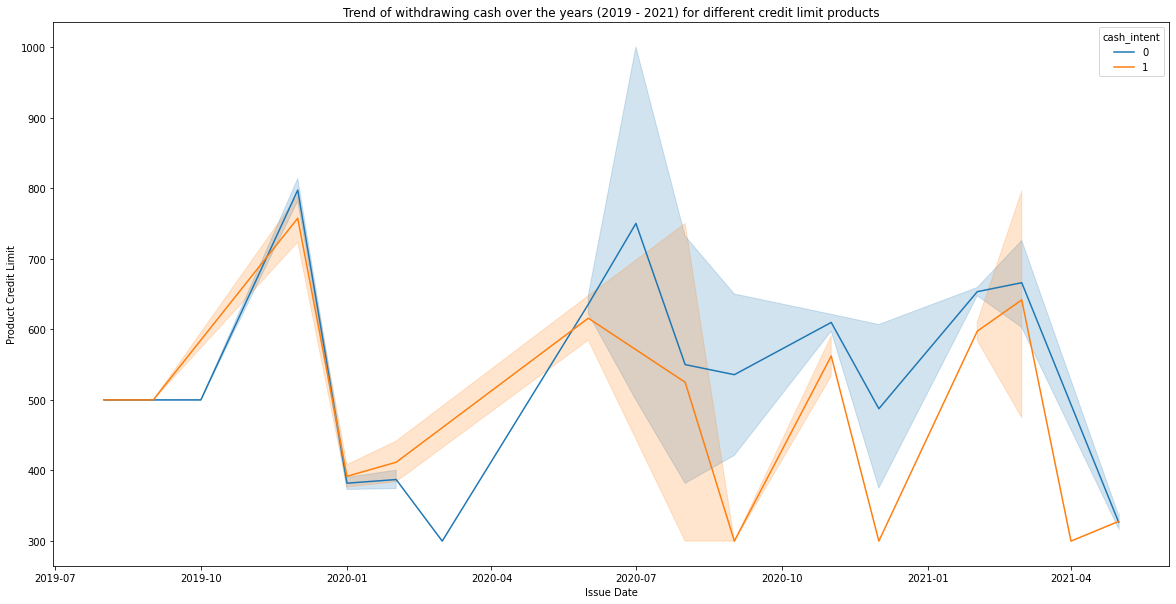

In [30]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x="portfolio_id", y="product_term_credit_limit", hue="cash_intent",data=master)
plt.title('Trend of withdrawing cash over the years (2019 - 2021) for different credit limit products')
ax.set(xlabel='Issue Date',ylabel='Product Credit Limit')

## Grabbing the Top Fifty Most Correlated Features

Grabbing the top fifty most correlated features will make the data frame easier to work with while still preserving its most relevant features. To do this we used a random forest classifier that compares the correlation between the  2344 features in our dataset and our target variable NP. 

In [31]:
df = pd.read_csv("credit_numeric.csv")

In [32]:
df.head()

,record_nb,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,ALJ5820,ALJ5830,...,month_7,month_8,month_9,month_10,month_11,month_12,product_term_credit_limit_300,product_term_credit_limit_500,product_term_credit_limit_750,product_term_credit_limit_1000
0,1,0,2,1,1,33521,50283,0,698,698,...,0,1,0,0,0,0,0,1,0,0
1,2,0,0,98,98,999999998,999999998,999999998,999999998,999999998,...,0,1,0,0,0,0,0,1,0,0
2,3,0,1,0,0,999999997,999999997,999999997,999999997,999999997,...,0,1,0,0,0,0,0,1,0,0
3,4,0,0,98,98,999999998,999999998,999999998,999999998,999999998,...,0,1,0,0,0,0,0,1,0,0
4,5,1,2,0,0,999999997,999999997,999999997,999999997,999999997,...,0,1,0,0,0,0,0,1,0,0


In [33]:
#find missing values 
df.isnull().any()

record_nb                         False
cash_intent                       False
ALJ0300                           False
ALJ0316                           False
ALJ0416                           False
                                  ...  
month_12                          False
product_term_credit_limit_300     False
product_term_credit_limit_500     False
product_term_credit_limit_750     False
product_term_credit_limit_1000    False
Length: 2346, dtype: bool

In [34]:
#dropping null values
df.dropna(inplace = True)
df.shape

(19030, 2346)

In [35]:
#spliting up the dataset
X = df.drop('record_nb', axis = 1)
y = df_credit['NP']

In [36]:

model=RandomForestClassifier()
 
model.fit(X,y)
 
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':model.feature_importances_})
feature_importances=feature_importances.sort_values('feature_importance',ascending=False)

### Create a new dataframe with the new columns

In [37]:
#Grab the first 
features = feature_importances.head(50)
features.head()

,features,feature_importance
2333,month_5,0.033880
2330,month_2,0.003079
472,ALS8220,0.002859
0,cash_intent,0.002839
368,ALL8320,0.002781


In [38]:
smaller_df = df[['cash_intent', 'record_nb','ALL8270','IQT9420','ALL8370','ALL0218',
                 'ALL8220','ALS8220','ALL8221', 'ILN5400', 'ALL8020',
                 'ALX8220','ALS5400','IQT9427','ALL8352','ALL4520',
                 'IQT9526','ALL0000','ALL8225', 'ALL5460', 'IQB9540',
                 'ILN8320', 'IQT9410', 'ALS0000', 'ALL5321', 'ALL7130',
                 'ALL8321','ALL8320', 'BRC5620', 'ILN8220', 'ALL8325',
                 'AUA5400', 'TBCA3527', 'ALX5020', 'BCC8132', 'ALX5030',
                 'ALL8355', 'ALL7120', 'ALL8152', 'ALL0200', 'IQT9426',
                 'ALL5935', 'REV5620', 'ALL8358', 'ALL5320', 'ALL5835',
                 'ALL5030', 'BRC8220', 'TBCA2526', 'ALL5360', 'ALL4028',
                 'year_2019', 'year_2020', 'year_2021', 'product_term_credit_limit_300',
                 'product_term_credit_limit_500', 'product_term_credit_limit_750', 
                 'product_term_credit_limit_1000']]
smaller_df.head()

,cash_intent,record_nb,ALL8270,IQT9420,ALL8370,ALL0218,ALL8220,ALS8220,ALL8221,ILN5400,...,TBCA2526,ALL5360,ALL4028,year_2019,year_2020,year_2021,product_term_credit_limit_300,product_term_credit_limit_500,product_term_credit_limit_750,product_term_credit_limit_1000
0,0,1,156,9,31,8,189,189,189,50283,...,179.0,0,112,1,0,0,0,1,0,0
1,0,2,85,22,21,11,127,127,127,11223,...,1800.0,13658,56,1,0,0,0,1,0,0
2,0,3,125,12,30,26,174,89,45,16736,...,3938.0,13818,363,1,0,0,0,1,0,0
3,0,4,84,4,29,27,150,150,150,31569,...,999999997.0,304289,0,1,0,0,0,1,0,0
4,1,5,49,3,18,2,77,77,28,21497,...,191.0,34724,8,1,0,0,0,1,0,0


In [39]:
## Examining the Cash Intent, Credit Term Limits, and Years of Operation
smallest_df =    smaller_df[['cash_intent','year_2019', 'year_2020', 'year_2021', 'product_term_credit_limit_300',
                 'product_term_credit_limit_500', 'product_term_credit_limit_750', 
                 'product_term_credit_limit_1000']]
smallest_df.head()

,cash_intent,year_2019,year_2020,year_2021,product_term_credit_limit_300,product_term_credit_limit_500,product_term_credit_limit_750,product_term_credit_limit_1000
0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0
4,1,1,0,0,0,1,0,0


### Correlation Heatmap

<AxesSubplot:>

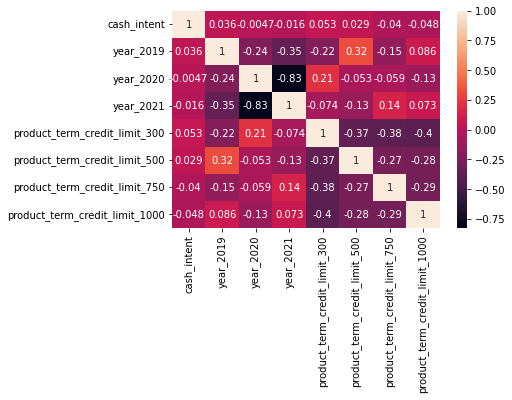

In [40]:
correlation = smallest_df.corr()
sns.heatmap(correlation, xticklabels =  correlation.columns, yticklabels = correlation.columns, annot= True)

### Percentage of the Data for Each Year of Operation

In [41]:
smallest_df['year_2019'].value_counts()

0    17308
1     1722
Name: year_2019, dtype: int64

In [42]:
smallest_df['year_2020'].value_counts()

0    12227
1     6803
Name: year_2020, dtype: int64

In [43]:
smallest_df['year_2021'].value_counts()

1    10505
0     8525
Name: year_2021, dtype: int64

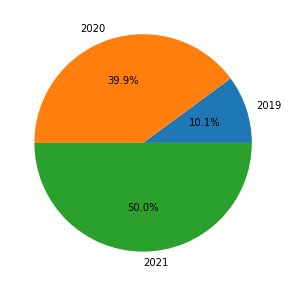

In [44]:
plt.figure(figsize = (5,5))

labels = ["2019", "2020", "2021"]
values = [1722, 6803, 8525]

plt.pie(values, labels = labels, autopct = '%2.1f%%')
plt.show()

### Percentage of Missed Payments Based on Credit Limits

In [45]:
smallest_df.shape

(19030, 8)

In [46]:
smallest_df = pd.concat([smallest_df,df_credit['NP']],axis=1, join='inner')

In [47]:
bad_credit = smallest_df['NP'] == 0
vc_300 = smallest_df['product_term_credit_limit_300'][bad_credit].value_counts()

In [48]:
vc_500 = smallest_df['product_term_credit_limit_500'][bad_credit].value_counts()

In [49]:
vc_750 = smallest_df['product_term_credit_limit_750'][bad_credit].value_counts()

In [50]:
vc_1000 = smallest_df['product_term_credit_limit_1000'][bad_credit].value_counts()

In [51]:
print("300:", vc_300[0]/(vc_300[0]+vc_300[1]),"\n", "500:", vc_500[0]/(vc_500[0]+vc_500[1]),"\n", "750:", vc_750[0]/(vc_750[0]+vc_750[1]),"\n" "1000", vc_1000[0]/(vc_1000[0]+vc_1000[1]))

300: 0.6655879803524993 
 500: 0.79560820572089 
 750: 0.7714533371857845 
1000 0.7673504767408263


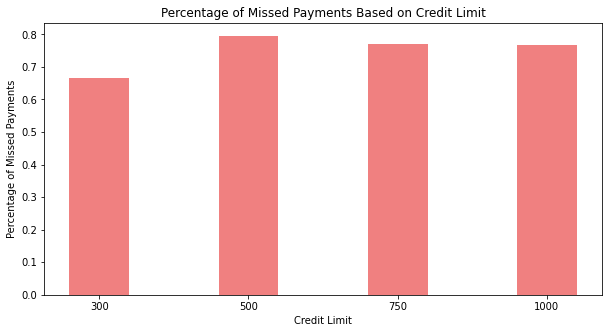

In [52]:
# creating the dataset
data = {'300': 0.665, '500':0.795, '750':0.771,
        '1000': 0.767}
credit = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(credit, values, color ='lightcoral',
        width = 0.4)
 
plt.xlabel("Credit Limit")
plt.ylabel("Percentage of Missed Payments")
plt.title("Percentage of Missed Payments Based on Credit Limit")
plt.show()